In [4]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import expit
from scipy.optimize import minimize
import warnings

In [5]:
def pad_data(x):
    return np.pad(x, ((0,0), (1,0)), constant_values=1.)

In [6]:
class Logistic:
    def __init__(self, w=None):
        self.w = w
    
    def train(self, xs, ys, w0=None):
        padded_xs = pad_data(xs)
        if w0 is None:
            w0 = np.array([0.]*padded_xs.shape[1])
        def cost(w):
            ps = expit(ys*np.dot(padded_xs, w))
            return -np.sum(np.log(ps))
        res = minimize(cost, w0)
        self.w = res.x
        if not res.success:
            warnings.warn(res.message)
        return self
    
    def predict(self, xs):
        padded_xs = pad_data(xs)
        return expit(np.dot(padded_xs, self.w))

# Basic Performance

Let us consider a fingerprint application to authenticate people through super secret stuff. So the class +1 means authenticate(Staff) and -1 means denied entry(Spy).

## What is True Positive?

In [ ]:
# of staff identified as staff

## What is False Positive?

In [ ]:
# of spy identified as staff

## What is True Negative?

In [ ]:
# of spy identified as spy

## What is False Negative?

In [ ]:
# of staff identified as spy

## Which of the above number you want to be high and which of the above number you want to be low?

In [7]:
# high true positive, true negative.
# low false negative, false positive.

# Confusion Matrix
Consider the folowing for staff(+1) and spy(-1) fingerprint (supposed that you reduce it to two numbers).

In [8]:
np.random.seed(1234)
n_sample = 1000
x1 = np.random.multivariate_normal([2,3],[[1, 0.5],[0.5,1]], size=n_sample)
x2 = np.random.multivariate_normal([3,4],[[1, -0.5],[-0.5,1]], size=n_sample)
xs = np.vstack([x1, x2])
ys = np.array([1.]*n_sample+[-1.]*n_sample)
padded_xs = pad_data(xs)

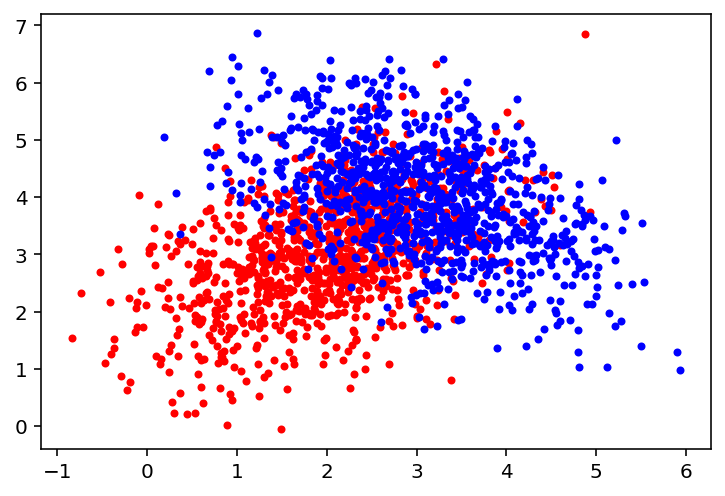

In [9]:
pos_x = xs[ys==1]
neg_x = xs[ys==-1]
plt.plot(pos_x[:,0], pos_x[:,1], '.r')
plt.plot(neg_x[:,0], neg_x[:,1], '.b')

## Consider a classification model defined below.
Find True positive numbers, True Negative numbers, False Positive numbers, False Negative numbers. If your decision whether some one is a spy or a staff based on 0.5 probability.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Desired error not necessarily achieved due to precision loss.
  from ipykernel import kernelapp as app


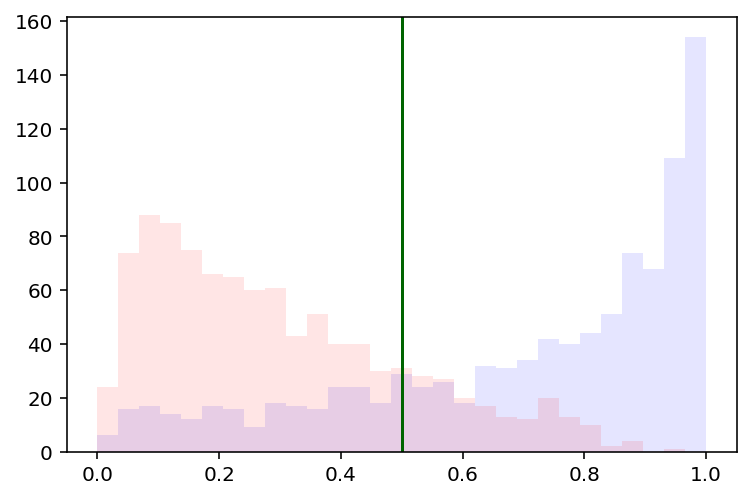

In [10]:
lgst = Logistic().train(xs, ys)
pred = lgst.predict(xs)
plt.hist(pred[ys==1],color='b',bins=np.linspace(0,1,30), alpha=0.1)
plt.hist(pred[ys==-1],color='r',bins=np.linspace(0,1,30), alpha=0.1)
plt.axvline(0.5, color='darkgreen')

In [15]:
from dataclasses import dataclass

@dataclass
class Stat:
    tp: float
    tn: float
    fp: float
    fn: float
        
def calculate_stat(threshold: float) -> Stat:
    predicted_pos = pred > threshold
    predicted_neg = ~predicted_pos
    
    actual_positive = ys > 0
    actual_negative = ~actual_positive
    
    tp = np.sum(predicted_pos & actual_positive)
    fp = np.sum(predicted_pos & actual_negative)
    tn = np.sum(predicted_neg & actual_negative)
    fn = np.sum(predicted_neg & actual_positive)
    
    return Stat(tp=tp, tn=tn, fp=fp, fn=fn)
    
calculate_stat(0.5)

Stat(tp=760, tn=820, fp=180, fn=240)

### Now put them in this table.
This table is called confusion matrix/table.

**At cut=0.5**

|            | Classified as Staff | Classified as Spy |
|------------|---------------------|-------------------|
| True Staff |        760           |        240           |
| True Spy   |          180           |        820           |





### If we increase the probability cut, which number will go higher and which number will go lower?

In [ ]:
true negative false negative

### Draw that confusion matrix again for the cut at 0.9.

In [16]:
calculate_stat(0.9)

Stat(tp=321, tn=999, fp=1, fn=679)

|            | Classified as Staff | Classified as Spy |
|------------|---------------------|-------------------|
| True Staff |        321           |        679           |
| True Spy   |          1           |        999           |

## Which cutoff is a better idea if the secret we are guarding is global nuclear launching code?

In [ ]:
From tonpai 0.6

## Let us change the context of the data. 
If the data were fingerprint for member shopper(+1) vs non-member(-1) shopper, think watson/boots etc. Where if you are classified as a member, you get some made up discount.

In [ ]:
From tonpai 0.6

# Stupid Metrics People Used

As you have seen that the metric to pick the cutoff really depends on the situation/context. Here are some stupid things(non-context based number) people used as a metric to pick a cut.

## First, Precision and Recall.

Precision is defined by 

$$precision = \frac{tp}{tp+fp}$$


$$recall = \frac{tp}{tp+fn}$$

calculate precision and recall for 0.5 cut and 0.9 cut.

Do you want this number to be high or low?

## F1 Score.
This is the dumbest idea yet very popular for "data scientist" who doesn't really know what they are doing.

$$
f1 = 2 \times \frac{precision \times recall}{precision + recall}
$$

If we were to maximize this number where would we put the cut for our fingerprint application both spy+staff and member+non member problem?

Why is this a stupid idea?

# ROC Curve

Let us talk about comparing two different models. Supposed you hired 2 people to build a classification model `lgst1` and `lgst2`. We want to decide which one is better.

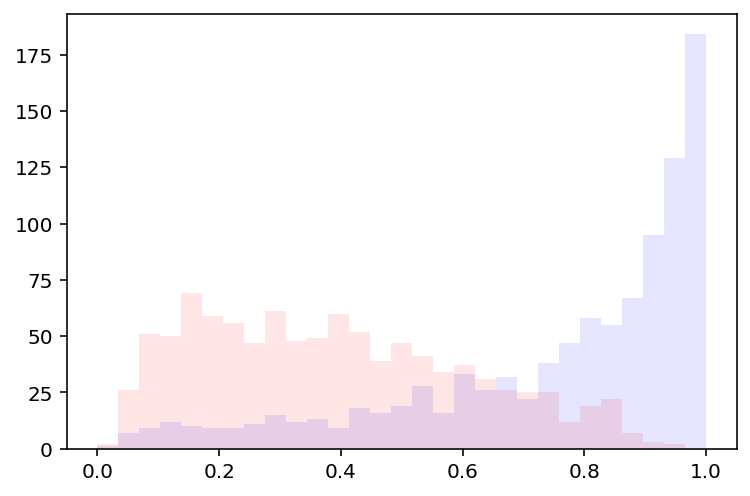

In [20]:
lgst1 = Logistic(np.array([7.1, -1.2, -1]))
pred1 = lgst1.predict(xs)
plt.hist(pred1[ys==1],color='b',bins=np.linspace(0,1,30), alpha=0.1)
plt.hist(pred1[ys==-1],color='r',bins=np.linspace(0,1,30), alpha=0.1);

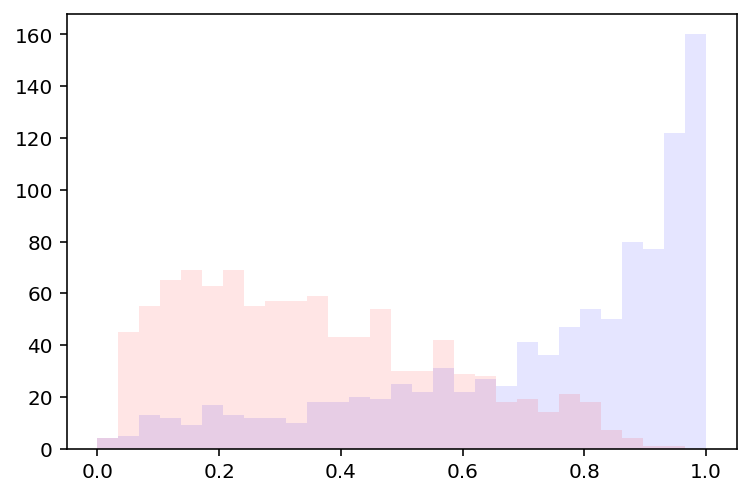

In [21]:
lgst2 = Logistic(np.array([7, -1.1, -1.1]))
pred2 = lgst2.predict(xs)
plt.hist(pred2[ys==1],color='b',bins=np.linspace(0,1,30), alpha=0.1)
plt.hist(pred2[ys==-1],color='r',bins=np.linspace(0,1,30), alpha=0.1);

## Let us define

$TPR = \frac{tp}{tp+fn}$ 
this is called true positive rate/sensitivity/10 other names. Essentially it's the fraction of true sample classified as true over all true sample.

$FPR = \frac{fp}{tn + fp}$
this is called false positive rate/10 other names.
Essentially it's fraction of false smaple classified as true over all negative sample.

If we have a perfect classifier, what should be the value for these two number?

In [22]:
@dataclass
class Stat:
    tp: float
    tn: float
    fp: float
    fn: float
    
    @property
    def tpr(self):
        return self.tp/(self.tp+self.fn)
    
    @property
    def fpr(self):
        return self.fp/(self.tn+self.fp)

def calculate_stat(prediction, xclass, threshold: float) -> Stat:
    predicted_pos = prediction > threshold
    predicted_neg = ~predicted_pos
    
    actual_positive = xclass > 0
    actual_negative = ~actual_positive
    
    tp = np.sum(predicted_pos & actual_positive)
    fp = np.sum(predicted_pos & actual_negative)
    tn = np.sum(predicted_neg & actual_negative)
    fn = np.sum(predicted_neg & actual_positive)
    
    return Stat(tp=tp, tn=tn, fp=fp, fn=fn)

## Calculate these two numbers if the cut were at 0.5 for both classifiers.


In [24]:
stat2 = calculate_stat(pred2, ys, 0.5)
stat1 = calculate_stat(pred1, ys, 0.5)

print(stat1.tpr, stat1.fpr)
print(stat2.tpr, stat2.fpr)


0.845 0.313
0.805 0.246


## ROC Curve
For $cut \in$ `np.linspace(0,1,30)` plot FPR on x axis and TPR on y axis for both classifiers.

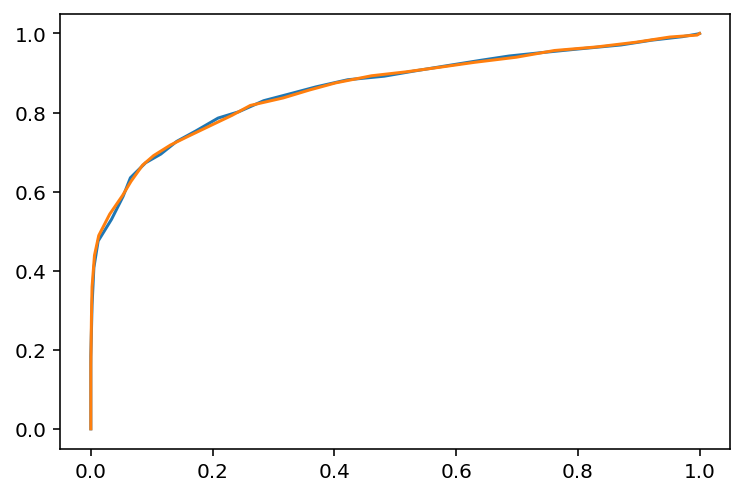

In [26]:
stat1s = [calculate_stat(pred1, ys, c) for c in np.linspace(0,1, 30)]
stat2s = [calculate_stat(pred2, ys, c) for c in np.linspace(0,1, 30)]

plt.plot(
    [s.fpr for s in stat1s],
    [s.tpr for s in stat1s]
)

plt.plot(
    [s.fpr for s in stat2s],
    [s.tpr for s in stat2s]
)






### Identify where the perfect classifer should be.

### Identify where the low probability cut(0.01) is and where the high probability cut (0.99) is.

### From the plot which classifiers is better? Why?

### You can see from the above that area is not a bad idea for comparing two classifiers. 

This metric is called aucroc (Area under the curve of ROC). Calculate aucroc for both (mid point/trapezoid would do).

## There are more than one way to make this kind of plot.

We can also plot things like Recall(x) vs Precision(y). If we were to plot that which corner is the perfect answer?

# Multiclass Problem

We want to classify yoyo in to 4 flavors using features such as package color, sweetness level.

Supposed we want to use 1 VS All algorithm. To do this.


## How many classifiers we need to train?

## How do we train each classifier? (Which one to call + and which one to call -)

## Write a table for perfect answer for each class.

## If the answer from all the classifier for a sample looks like 
$$(0.1,0.2,0.3,0.6)$$
What class should it be?

## what about
$$(0.6,0.6,0.7,0.7)$$

## How many answers we can get wrong before the classifier start getting confused?

## How can we do better against wrong answer?

## Write down the exhaustive matrix for 4 classes.

# Real Exercise

Read glass.data and build a classifier to classify glass.

- Note that there is no sample for glass number 4
- Also use exhaustive matrix.
- To make your life easy forget about splitting it into train test.
- What would print/plot to make sure that your answer make sense?
- Use logistic for each classifiers.
- see glass.names.txt for data description

What is this glass?

$$1.5,14.8,0.00,2.00,73.00,0.00,8.00,1.7,0.00$$

In [64]:
from sklearn.multiclass import OutputCodeClassifier
from sklearn.linear_model import LogisticRegression

clf = OutputCodeClassifier(LogisticRegression(random_state=0),
                           code_size=100, random_state=0)

In [65]:
import pandas as pd

df = pd.read_csv('glass.data.txt', header=None)
classes = df[10]
features = df[[1,2,3,4,5,6,7,8]]


clf.fit(features, classes)
features


/Users/piti/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/piti/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

/Users/piti/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/piti/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

/Users/piti/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/piti/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

/Users/piti/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/piti/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

/Users/piti/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/piti/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

/Users/piti/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/piti/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

/Users/piti/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/piti/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

/Users/piti/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/piti/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

/Users/piti/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/piti/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

/Users/piti/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/piti/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

/Users/piti/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/piti/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

/Users/piti/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/piti/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

,1,2,3,4,5,6,7,8
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00
...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57


In [66]:
np.sum(clf.predict(features) == classes) / len(classes)

0.616822429906542

In [63]:
clf.predict([[1.5,14.8,0.00,2.00,73.00,0.00,8.00,1.7]])

array([7])